# Практическая работа №3
## по предмету "Системы искусственного интеллекта"
### БВТ2101 Юдин Артём

Целью практической работы является изучение методов регрессии.

В данно работе вам необходимо:
1. используя библиотеку sklearn, обучить линейную регрессию без использования регуляризации
2. изучить работу класса Lasso для регуляризации, подобрать наилучший параметр для данного набора данных.
3. изучить работу класса Ridge для регуляризации, подобрать наилучший параметр альфа для данного набора данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("../csv/AISP2.csv")
df.sample(5)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
411,ASUS,Intel,Core i5,11th,8 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,No warranty,No,No,84500,4 stars,3,0
260,DELL,Intel,Core i5,10th,16 GB,DDR4,512 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,79990,3 stars,0,0
24,ASUS,Intel,Core i3,11th,4 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,34429,4 stars,37,6
22,HP,Intel,Core i3,7th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,32955,4 stars,311,27
364,DELL,Intel,Core i5,11th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,2 GB,Casual,1 year,Yes,Yes,82990,4 stars,21,2


In [2]:
df = pd.read_csv("../csv/AISP2.csv")
df = df.drop(["Number of Reviews", "processor_brand",], axis="columns")

cat_cols = [
    "brand",
    'processor_name',
    'processor_gnrtn',
    'ram_gb',
    'ram_type',
    'ssd',
    'hdd',
    'os',
    'os_bit',
    'graphic_card_gb',
    'weight',
    'warranty',
    'Touchscreen',
    'msoffice',
    'rating'
]

num_cols = ['Number of Ratings']
target_col = ['Price']

X_train, X_test, y_train, y_test = train_test_split(df.drop(target_col, axis="columns"),
                                                    df[target_col],
                                                    test_size=0.1,
                                                    shuffle=True,
                                                    random_state=42)

In [3]:
cat_trans = OneHotEncoder(handle_unknown="ignore", drop="first")
num_trans = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_cols),
        ('cat2', cat_trans, cat_cols),
    ]
)

rmse_reg = [1e+10] * 3
alpha = [-1] * 2

alphas = np.arange(0, 5, 0.1)
param_grid = {"regr__alpha": alphas}

In [4]:
lin_reg_sk = LinearRegression()
lin_reg_sk.fit(preprocessor.fit_transform(X_train), y_train)
rmse_reg[0] = rmse(y_test, lin_reg_sk.predict(preprocessor.transform(X_test)))
rmse_reg[0]

23059.743978397513

In [5]:
model_lasso = Lasso()
pipeline_lasso = Pipeline([("preprocessor", preprocessor), ("regr", model_lasso)])
lasso_grid = GridSearchCV(pipeline_lasso, param_grid=param_grid, cv=5, scoring="neg_root_mean_squared_error")
lasso_grid.fit(X_train, y_train)

rmse_reg[1] = rmse(y_test, lasso_grid.best_estimator_.predict(X_test))
alpha[0] = lasso_grid.best_params_["regr__alpha"]

print("GreadSearch RMSE Lasso:", rmse_reg[1])
print("Best alpha param from GridSearch Lasso:", alpha[0])


GreadSearch RMSE Lasso: 22732.726005559452
Best alpha param from GridSearch Lasso: 4.9


In [6]:
model_ridge = Ridge()
pipeline_ridge = Pipeline([("preprocessor", preprocessor), ("regr", model_ridge)])
ridge_grid = GridSearchCV(pipeline_ridge, param_grid=param_grid, cv=5, scoring="neg_root_mean_squared_error")
ridge_grid.fit(X_train, y_train)

rmse_reg[2] = rmse(y_test, ridge_grid.best_estimator_.predict(X_test))
alpha[1] = ridge_grid.best_params_["regr__alpha"]

print("GreadSearch RMSE Ridge:", rmse_reg[2])
print("Best alpha param from GridSearch Ridge:", alpha[1])

GreadSearch RMSE Ridge: 22717.682343637225
Best alpha param from GridSearch Ridge: 0.6000000000000001


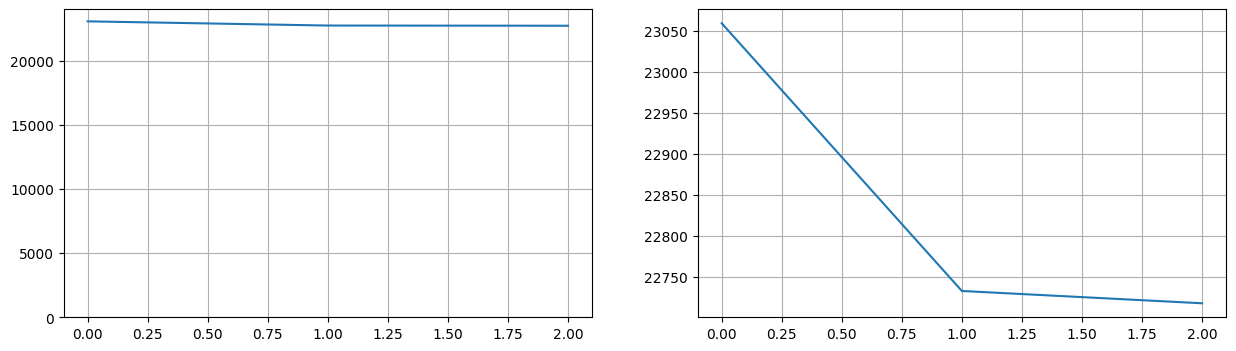

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].plot(rmse_reg)
ax[0].set_ylim((0, 24_000))
ax[0].grid()

ax[1].plot(rmse_reg)
ax[1].grid()
plt.show()